### Notes On Week 4 - Introduction to Derivative Securities

__Futures__

_Mechanics of Futures Contract_

* Individuals open a margin account with a broker
* Enter into N futures contracts with price F0
* Deposit initial margin into the account ≈ 5 − 10% of contract value
* All profit/loss settled using margin account
* Margin call if balance is low

_Hedging Using Futures using an example_

Today is Sept. 1st. A baker needs 500, 000 bushels of wheat on December 1st. So, the baker faces the risk of an uncertain price on Dec. 1st.
Hedging strategy: buy 100 futures contracts maturing on Dec. 1st – each for
5000 bushels

Cash flow on Dec. 1st

Futures position at maturity: $F_T - F_0 = S_T - F_0$

Buy in the spot market: $S_T$

Effective cash flow: $S_T - F_0 - S_T = -F_0$

Price fixed at $F_0$ !

_Futures Minimum Variance Hedging_

This is required if the perfect heding is not possible.

$C_T$ is the effective Cash Flow. 

$P_T$ is the spot price at time T.

$(F_T - F_0)*y$ is the Futures position at maturity for $y$ imperfect futures.

$var(C_T) = var(P_T) + var(y(F_T - F_0)) - 2*cov(y(F_T - F_0), P_T) = var(P_T) + y^2*var(F_T - F_0) - 2*y*cov(F_T, P_T)$

differentiating variance of Cash Flow with respect to y and equating it to 0 will give optimal hedging Futures Contract

$y^* = \frac{cov(F_T, P_T)}{var(F_T)}$

_Pricing Interest Rate Swaps_

$r_t$ = floating (unknown) interest rate at time t

Cash flows at time t = 1, . . . , T
* Company A (long): receives $N_{r_{t−1}}$ and pays NX
* Company B (short): receives NX and pays $N_{r_{t−1}}$

Value of swap to company A
* $N(r_0, . . . , r_{t-1})$ = Cash flow of floating rate bond - Face value. Therefore,value of swap to company A

$V_A = N(1 - d(0, T)) - N X \sum_{t=1}^{T} d(0, t) $

Set X so that $V_A = 0$

$X = \frac{1 - d(0, T))}{\sum_{t=1}^{T} d(0, t)}$

X is the fixed rate of the Interest Rate Swap that will make Swap Value as 0 at initiation. 

_Options_

European put-call parity at time t for non-dividend paying stock:

$p_E(t; K, T) + S_t = c_E(t; K, T) + Kd(t, T)$

Trading strategy
* At time t buy European call with strike K and expiration T
* At time t sell European put with strike K and expiration T
* At time t (short) sell 1 unit of underlying and buy at time T
* Lend K · d(t, T) dollars up to time T

Effect of dividends $p_E(t; K, T) + S_t − D = c_E(t; K, T) + Kd(t, T)$
* D = present value of all dividends until maturity
 
_Derivative Security Pricing_

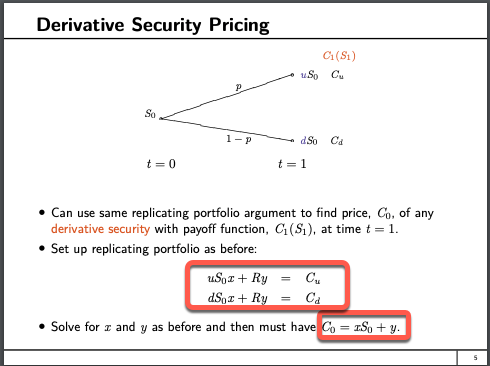

_Derivative Pricing_

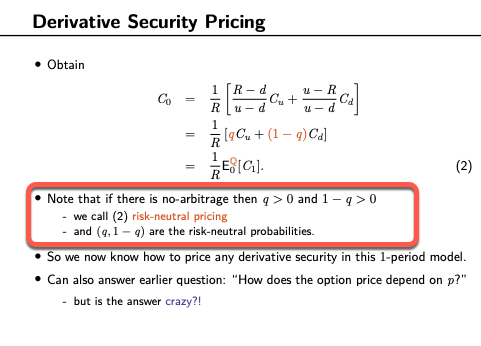

### Question 1

__Term structure of interest rates and swap valuation__

Suppose the current term structure of interest rates, assuming annual compounding, is as follows:

| $s_1$ | $s_2$ | $s_3$ | $s_4$ | $s_5$ | $s_6$ |
| :--- | :--- | :--- | :--- | :--- | :--- |
| 7.0\% | 7.3\% | 7.7\% | 8.1\% | 8.4\% | 8.8\% |

What is the discount rate $d(0,4)$? (Recall that interest rates are always quoted on an annual basis unless stated otherwise.)

Please submit your answer rounded to three decimal places. For example, if your answer is 
0.4567
0.4567 then you should submit an answer of 
0.457
0.457.

In [2]:
import numpy as np
import pandas as pd
rates = np.array([7, 7.3, 7.7, 8.1, 8.4, 8.8]) / 100
time = np.arange(1, 7, 1)

df = pd.DataFrame({'Time' : time, 'Rates' : rates})
df['DiscountRate'] = np.round((1+df['Rates'])**(-1*(df['Time'])), 3)
# df
n = 4
print(f"The d(0,{n}) is {df[df['Time'] == n]['DiscountRate'].values[0]}")



NameError: name 'pd' is not defined

### Question 2

__Swap Rates__

Suppose a 6-year swap with a notional principal of \$10 million is being configured. What is the fixed rate of interest that will make the value of the swap equal to zero? (You should use the term structure of interest rates from Question 1) 

Please submit your answer as a percentage rounded to two decimal places. For example, if your answer is 
4.567\% or equivalently 0.04567, then you should submit an answer of 4.57.

In [ ]:
n = 6

X = (1 - df[df['Time'] == n ]['DiscountRate'].values[0]) / df['DiscountRate'].sum()
print(f"The fixed Interest Rate that will make value of Swap 0 is {np.round(X*100, 2)}%")

### Question 3 

__Hedging using futures__

Suppose a farmer is expecting that her crop of oranges will be ready for harvest and sale as 150,000 pounds of orange juice in 3 months time. Suppose each orange juice futures contract is for 15,000 pounds of orange juice and the current futures price is $F_0 = 118.85$ cents-per-pound. 

Assuming that the farmer has enough cash liquidity to fund any margin calls, what is the risk-free price that she can guarantee herself?

Please submit your answer in cents-per-pound rounded to two decimal places. For example, if your answer is 123.456, then you should submit an answer of 123.47.

In [ ]:
f_0 = 118.65
print(f"The Risk Free price is F0 Future's Price {f_0}")

### Question 4

__Call Options__

Consider a 1-period binomial model with $R = 1.02$, $S_0 = 100$, $u = \frac{1}{d} = 1.05$. Compute the value of a European call option on the stock with strike $K = 102$. The stock does not pay dividends.

Please submit your answer rounded to two decimal places. For example, if your answer is 3.4567 then you should submit an answer of 3.46.

In [ ]:
K = 102
S_0 = 100
R = 1.02
u = 1.05
d = 1/u

print(f"The equation is {S_0*u} * X + {R} * Y = {np.maximum(S_0*u - K, 0)}")
print(f"The equation is {S_0*d} * X + {R} * Y = {np.maximum(S_0*d - K, 0)}")
a = np.array([[S_0*u, R], [S_0*d, R]])
b = np.array([np.maximum(S_0*u - K, 0), np.maximum(S_0*d - K, 0)])
x, y = np.linalg.solve(a, b)
print(f"The price of Call Option is {np.round(S_0*x + y, 2)}")

### Question 5

__Call Options II__

When you construct the replicating portfolio for the option in the previous question, how many dollars do you need to invest in the cash account?

Please submit your answer rounded to three decimal places. For example, if your answer is −43.4567 then you should submit an answer of −43.457.

In [ ]:
print(f"The Dollars one need to invest in Cash Account is ${np.round(y, 3)}")